## Fetch Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data with headers
headers = ["Season", "Age", "Childish_Diseases", "Trauma_Past",
           "Surgery_Past", "Fewer", "Alcohol_Consu", "Smoking", "Sitting_Hour", "Conclusion" ]

data = pd.read_table('fertility_Diagnosis.txt', delimiter = ',', names=headers)
data

,Season,Age,Childish_Diseases,Trauma_Past,Surgery_Past,Fewer,Alcohol_Consu,Smoking,Sitting_Hour,Conclusion
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


## Exploratory Data Analysis and Data Visualization

In [3]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             100 non-null    float64
 1   Age                100 non-null    float64
 2   Childish_Diseases  100 non-null    int64  
 3   Trauma_Past        100 non-null    int64  
 4   Surgery_Past       100 non-null    int64  
 5   Fewer              100 non-null    int64  
 6   Alcohol_Consu      100 non-null    float64
 7   Smoking            100 non-null    int64  
 8   Sitting_Hour       100 non-null    float64
 9   Conclusion         100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
# check the unique values 
for column in ((data.drop('Conclusion', axis = 1)).columns):
    print(f"Unique values of '{column}' column = {(data.drop('Conclusion', axis = 1)[column].unique())}")

Unique values of 'Season' column = [-0.33  1.   -1.    0.33]
Unique values of 'Age' column = [0.69 0.94 0.5  0.75 0.67 1.   0.64 0.61 0.78 0.81 0.56 0.58 0.53 0.72
 0.92 0.86 0.89 0.83]
Unique values of 'Childish_Diseases' column = [0 1]
Unique values of 'Trauma_Past' column = [1 0]
Unique values of 'Surgery_Past' column = [1 0]
Unique values of 'Fewer' column = [ 0 -1  1]
Unique values of 'Alcohol_Consu' column = [0.8 1.  0.6 0.2 0.4]
Unique values of 'Smoking' column = [ 0  1 -1]
Unique values of 'Sitting_Hour' column = [0.88 0.31 0.5  0.38 0.44 0.25 0.13 0.63 0.19 0.75 1.   0.56 0.47 0.06]


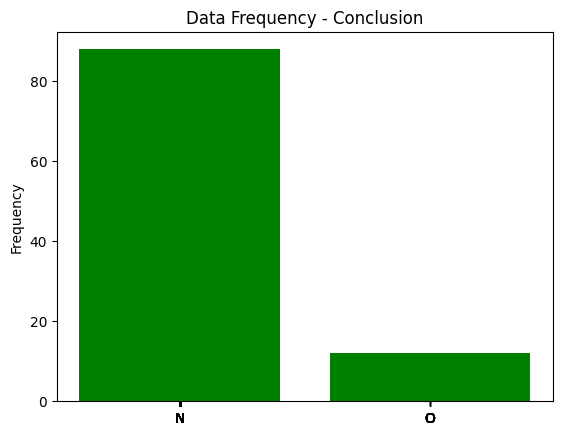

Number of Conclusion 
N    88
O    12
Name: Conclusion, dtype: int64


In [5]:
# Number of Conclusions
plt.figure()
plt.bar(data["Conclusion"].value_counts().index, data["Conclusion"].value_counts(), color = "green")
plt.xticks(data["Conclusion"].values)
plt.ylabel("Frequency")
plt.title(f"Data Frequency - Conclusion")
plt.show()
print(f"Number of Conclusion \n{data['Conclusion'].value_counts()}")

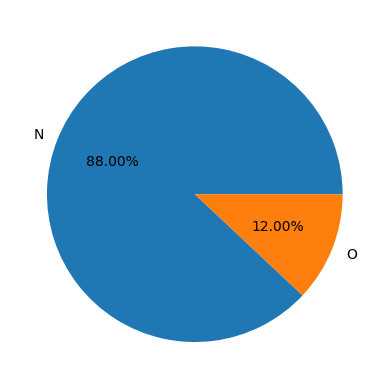

In [6]:
# plot a pie chart and see percentages of Conclusion
plt.pie(data['Conclusion'].value_counts(), labels=data['Conclusion'].unique(), autopct='%1.2f%%')
plt.show() 

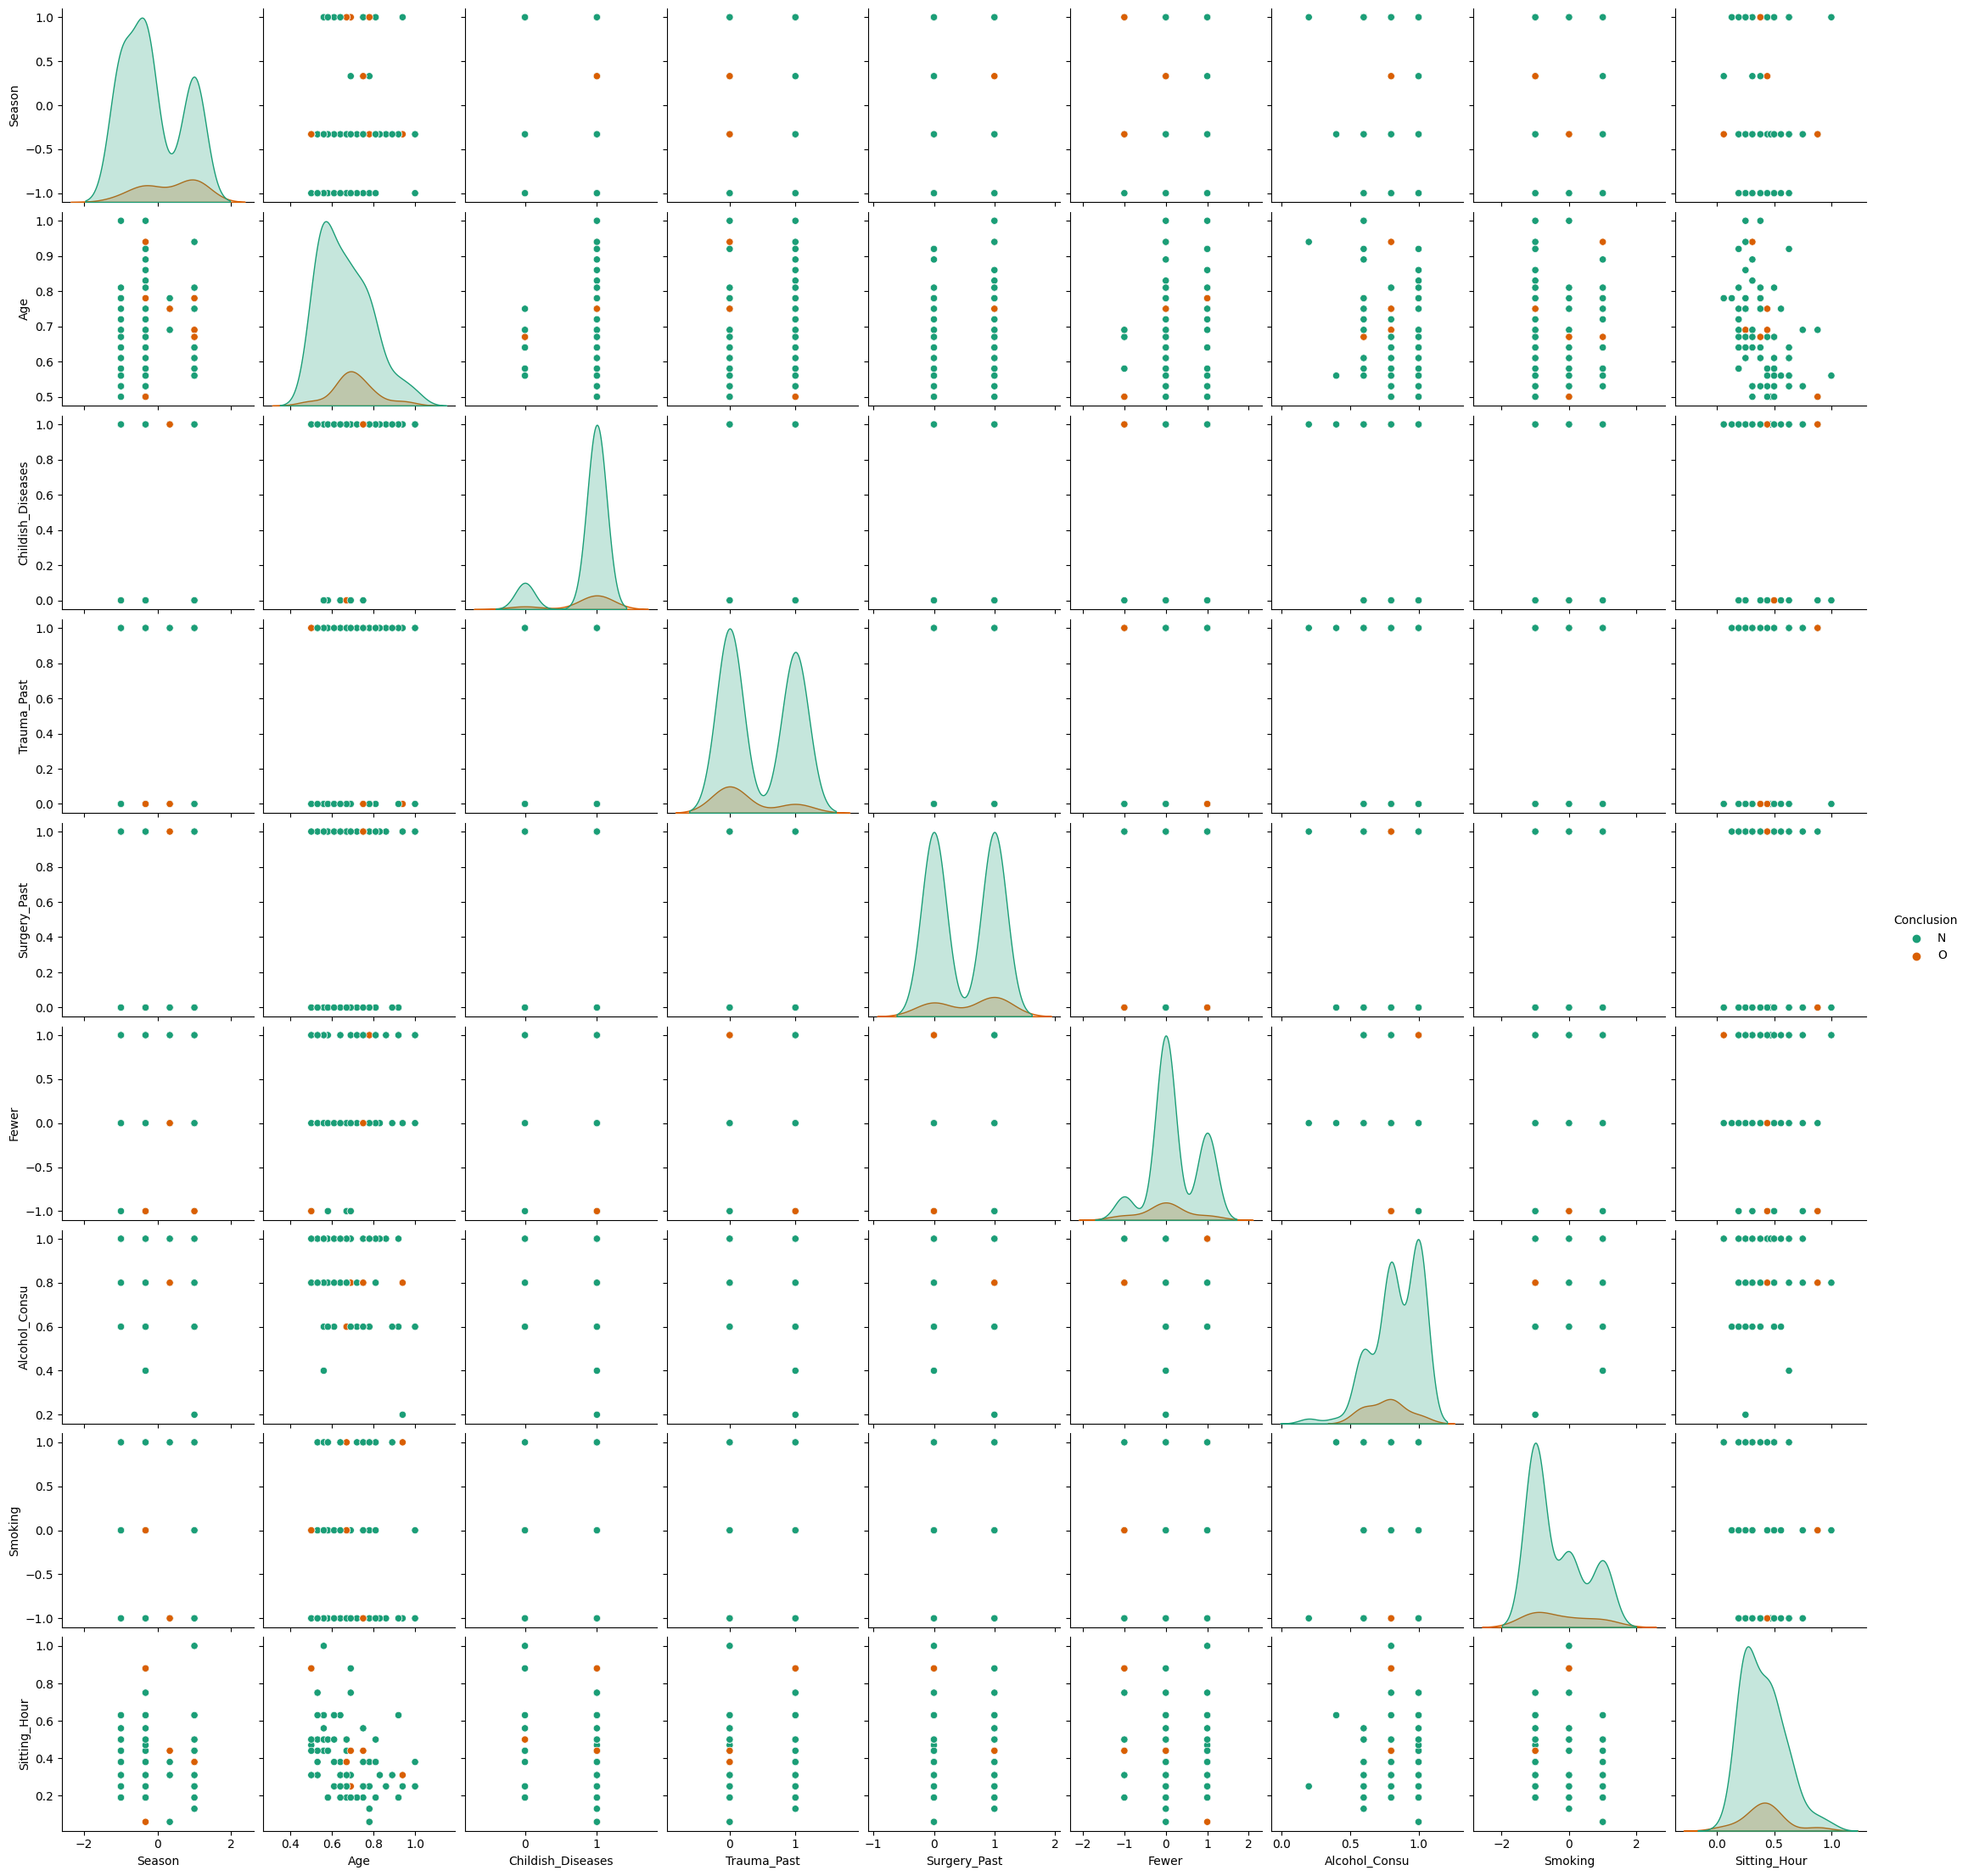

In [7]:
# see pairplot for relation between the columns
sns.pairplot(data, hue="Conclusion", palette='Dark2')
plt.show()

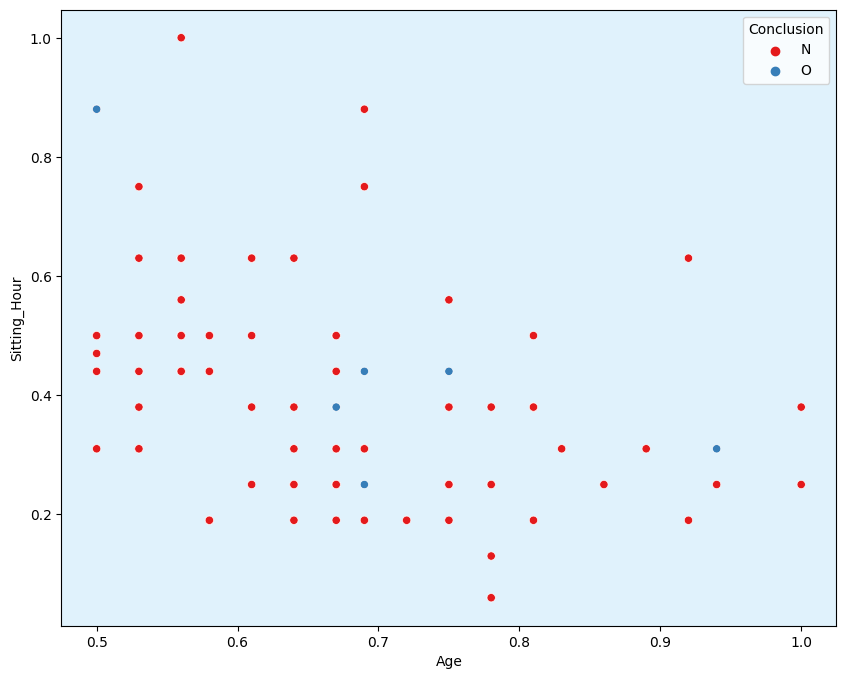

In [8]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data['Age'], data['Sitting_Hour'], hue=data['Conclusion'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.show()

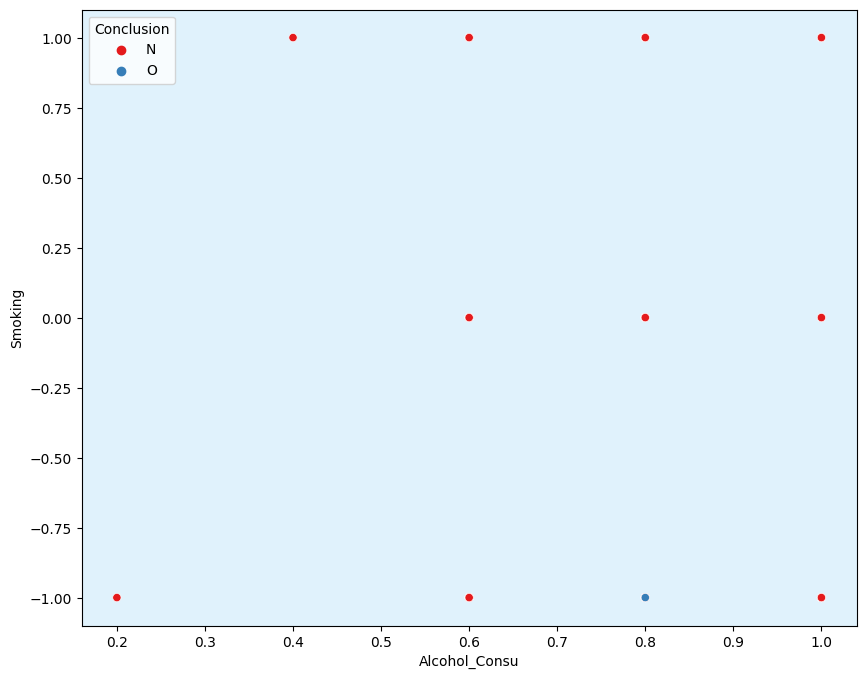

In [9]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data['Alcohol_Consu'], data['Smoking'], hue=data['Conclusion'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.show()

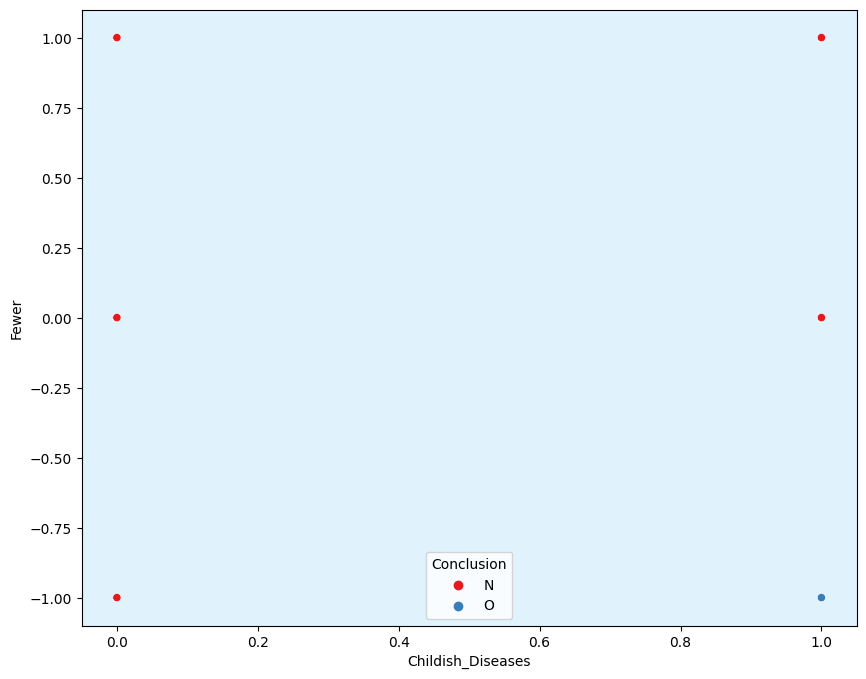

In [10]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data['Childish_Diseases'], data['Fewer'], hue=data['Conclusion'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.show()

In [11]:
# function for plot histogram
def plotHistogram(column):
    """
        input: Column name
        output: Histogram plot
    """
    
    plt.figure()
    plt.hist(data[column], bins = 30, color = "orange")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()

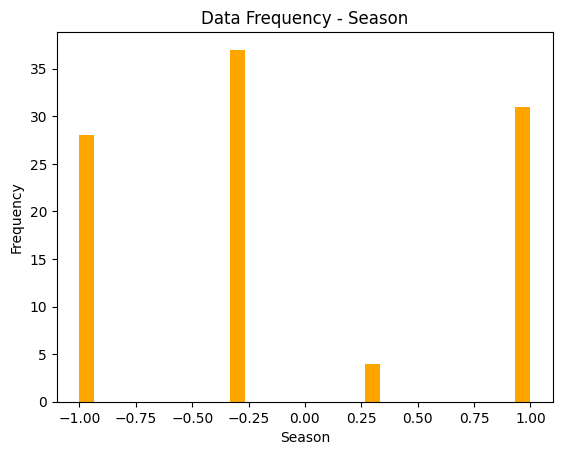

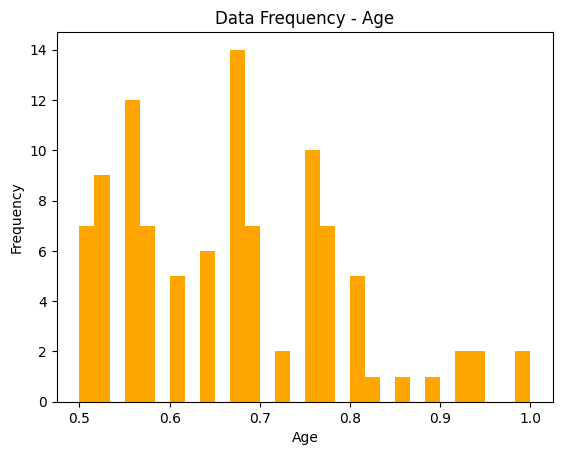

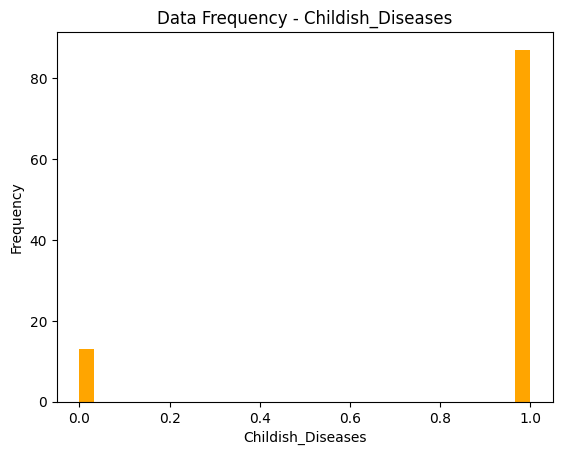

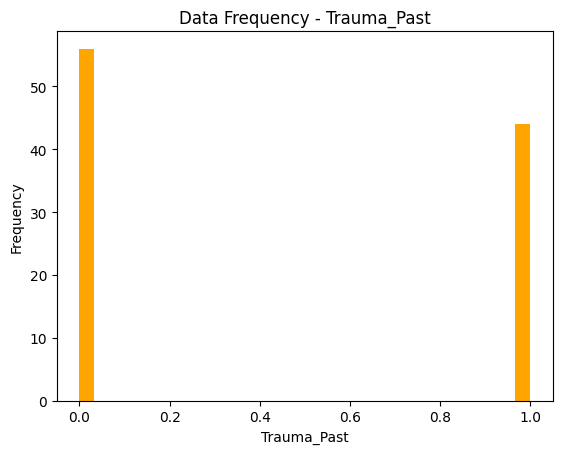

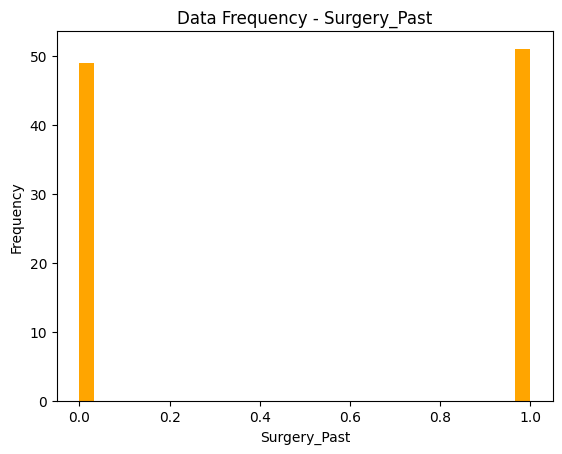

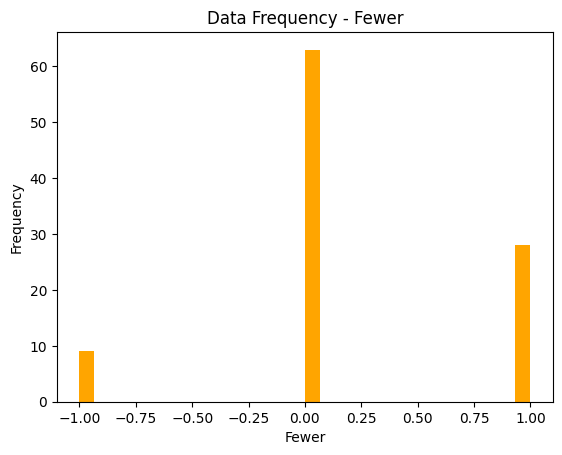

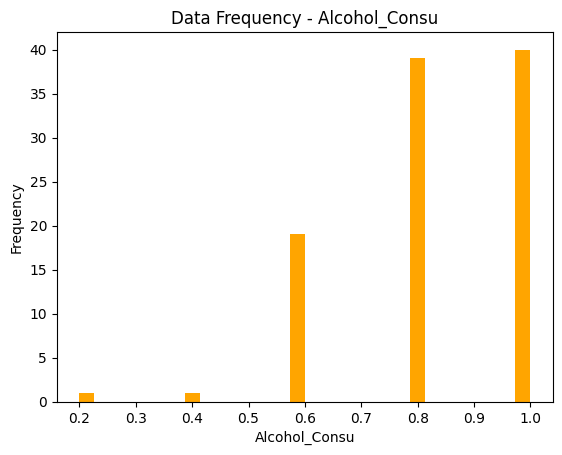

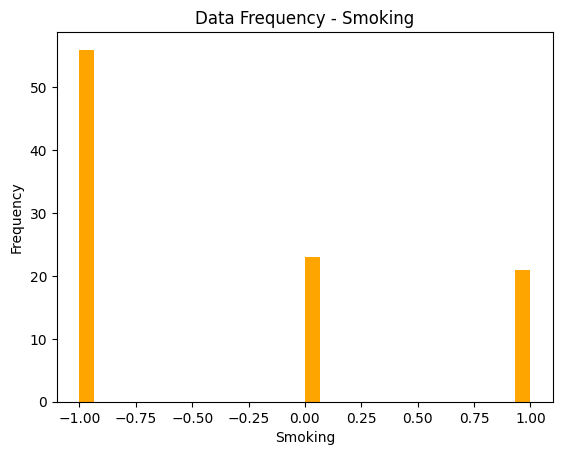

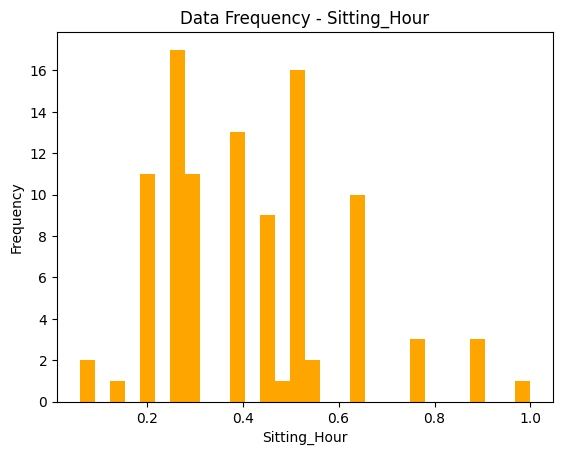

In [12]:
# plot histogram for numerical variables 
numerical_variables = (data.drop(labels="Conclusion",axis=1)).columns
for i in numerical_variables:
    plotHistogram(i)

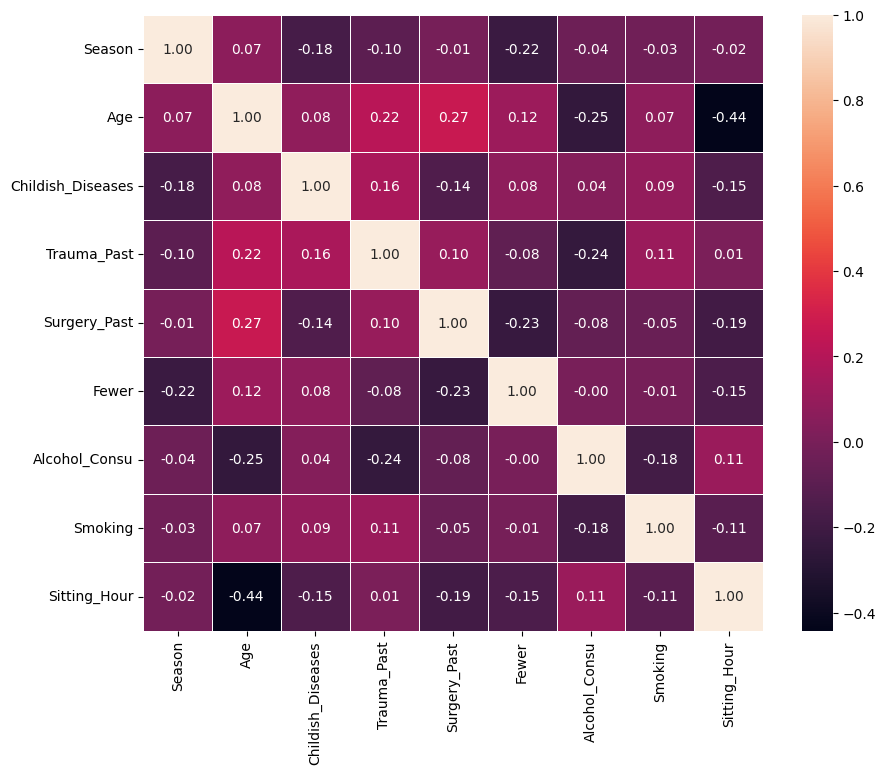

In [13]:
# correlation between numerical variables
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.loc[:,["Season", "Age", "Childish_Diseases", "Trauma_Past", "Surgery_Past", "Fewer",
                        "Alcohol_Consu", "Smoking", "Sitting_Hour"]].corr(),
            annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

## Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [15]:
data["Conclusion"] = labelEncoder(data["Conclusion"])

Encoding Approach:
N  ==>  0
O  ==>  1


In [16]:
# create input and output
X = data.drop('Conclusion', axis = 1)
y = data['Conclusion']

In [17]:
# standardization and train test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardScale = StandardScaler()
standardScale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (80, 9)
y_train: (80,)
X_test: (20, 9)
y_test: (20,)


## Model Training and Evaluation

In [18]:
# import classifiers and metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def allClassifiers(X_train, X_test, y_train, y_test):
    """
    This function use multple machine learning classifier and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: accuracy score, classification report, confusion matrix for each classifier 
    and comparison plot for classifiers according to accuracy
    """
    
    
    classifiers = [SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(),
                   BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
                   LogisticRegression(), XGBClassifier()]
    accuracy_score_dict = {}
    acc_scores = []
    
    
    # function for accuracy score
    def accScore(classifier):
        """
        :param classifier: classifier model function
        :return: accuracy score for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, pred)
        return acc_score
    

    # function for confusion matrix and classification report
    def confusionandReport(classifier):
        """
        :param classifier: classifier model function
        :return: confusion matrix and classification report for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(f"Confusion Matrix and Classification Report for {classifier} Classifier")
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))


    # accuracy score, confusion matrix and classification report for each classifier 
    for classifier in classifiers:
        name = classifier.__class__.__name__
        accuracy_score_dict[name] = accScore(classifier)
        acc_scores.append(accScore(classifier))
        print("*************************************************************************")
        print(f"{name} Accuracy Score = {accuracy_score_dict[name]}")
        confusionandReport(classifier)
        

    #Plotting the performance of Classifiers
    def plotPerformance(scores_list, scores_dict):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include classifier and evaluation scores
        :return: plot of performance comparison of classifiers
        """
        
        N = len(classifiers)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Classifiers")
        plt.title("Performance Comparison of Classifiers")
        plt.ylabel("Accuracy Score")
        plt.xticks(x,
                   scores_dict.keys(),
                   rotation=90)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.show()
    
    # call the function
    plotPerformance(acc_scores, accuracy_score_dict)

*************************************************************************
SVC Accuracy Score = 0.95
Confusion Matrix and Classification Report for SVC() Classifier
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20

*************************************************************************
DecisionTreeClassifier Accuracy Score = 0.9
Confusion Matrix and Classification Report for DecisionTreeClassifier() Classifier
[[16  3]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.00      0.00      0.00         1

    accuracy                           0.80        20
   macro avg       0.47      0.42      0.44        2

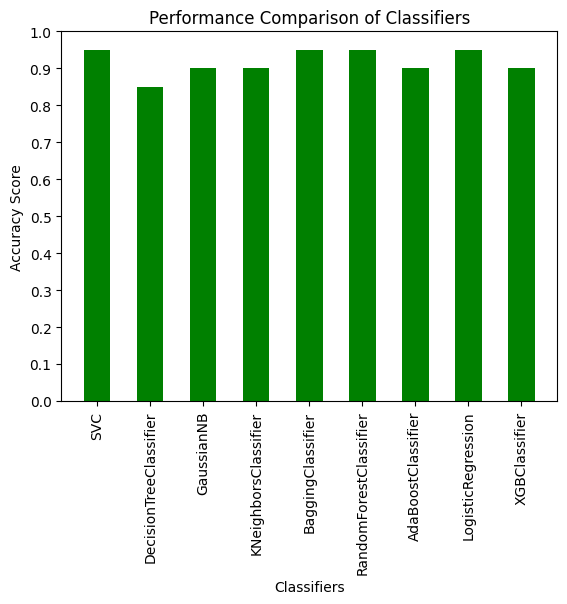

In [19]:
allClassifiers(X_train, X_test, y_train, y_test)

## Model Selection and Tuning 

In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)
print('Train Accuracy Score for Random Forest Classifier:', accuracy_score(rf_train_predictions, y_train))
print("Test Accuracy Score for Random Forest classifier:", accuracy_score(rf_test_predictions, y_test))
print(confusion_matrix(y_test, rf_test_predictions))
print(classification_report(y_test, rf_test_predictions))

Train Accuracy Score for Random Forest Classifier: 0.9875
Test Accuracy Score for Random Forest classifier: 0.95
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



In [21]:
# GridSearchCV for Random Forest
from sklearn.model_selection import GridSearchCV
rf_parameters = {'n_estimators': [i for i in range(100, 600, 100)],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth' : [x for x in range(1, 8, 2)],
                 'criterion' : ['gini', 'entropy']}
gsc_rf = GridSearchCV(rf_model, rf_parameters, cv=5, verbose=1, n_jobs=1)
grid_results_rf = gsc_rf.fit(X_train, y_train)
grid_results_rf.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'n_estimators': 100}

In [22]:
# Summarize the results in a readable format
print(f"Best 8 test score: {(np.sort(grid_results_rf.cv_results_['mean_test_score']))[::-1][:8]}")
results_df = pd.DataFrame(grid_results_rf.cv_results_)

cleaned_results_df = results_df[["mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]]
cleaned_results_df.sort_values("rank_test_score").head(3)

Best 8 test score: [0.8625 0.8625 0.8625 0.8625 0.8625 0.8625 0.8625 0.8625]


,mean_fit_time,mean_test_score,std_test_score,rank_test_score
0,0.149741,0.8625,0.025,1
89,0.468648,0.8625,0.025,1
88,0.368657,0.8625,0.025,1


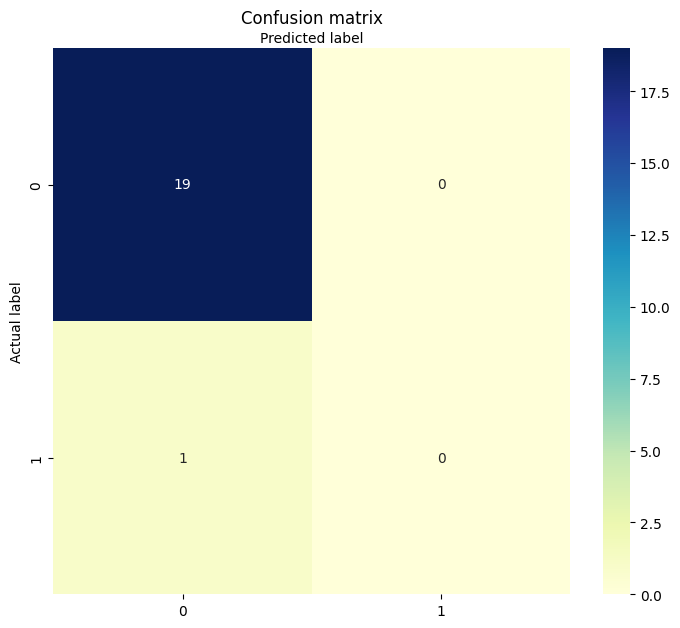

After Tuning Test Accuracy Score for Random Forest Classifier: 0.95


In [23]:
# Extract the best model
best_clf = grid_results_rf.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("After Tuning Test Accuracy Score for Random Forest Classifier:", accuracy_score(y_pred, y_test))